# 3. LDA(Linear Discriminant Analysis)
## LDA 개요
#### LDA는 선형 판별 분석법이라 불리며, PCA와 매우 유사하다.
#### 입력 데이터 세트를 저차원 공간에 투영해 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.
#### PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾는다.

#### 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소한다.
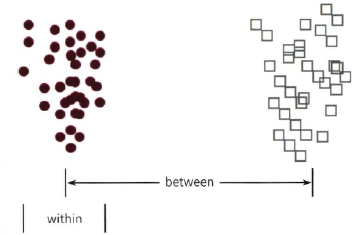

#### PCA와 가장 큰 차이점은 공분산 행렬이 아니라 위에 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬을 기반해 고유백터를 구하고 입력데이터를 투영한다.
#### LDA의 수행 순서는 아래와 같다.
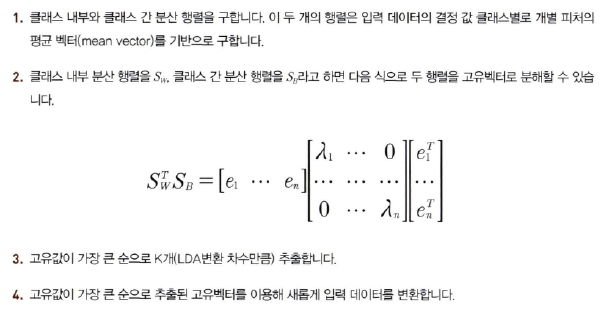

## 붓꽃 데이터 세트에 LDA 적용하기

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)
lda = LinearDiscriminantAnalysis(n_components=2)
# fit 호출 시 클래스의 결정값(iris.target) 입력
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


#### 한 가지 유의해야 할점은 LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 지도학습이다.
#### 즉, 클래스의 결정값이 변환 시에 필요하다! 다음 lda 객체에 fit() 메서드를 호출할 때 결정값이(iris_target)이 입력되었음을 유의하자 

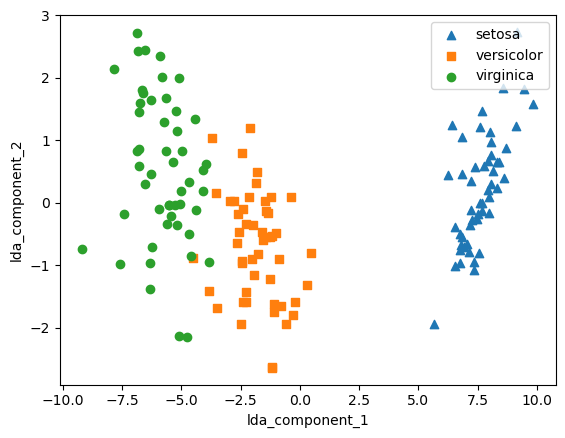

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

#### PCA로 변환된 데이터와 좌우 대칭 형태로 많이 닮아있다.